# Introduction to the Titanic data set
<li>This project investigates the information of 891 passengers on a British liner named "Titanic". Which sank in Atlantic Ocean in 1912. Passengers: 2,435, crew: 892. Total: 3,327. Lifeboats: 20 (sufficient for 1,178 people).More than 1500 people died. So the data used here is part of the total data. The data set contains a variety of variables concerning passenger's age,gender, family, ticket, and survival infromation listed as below:
<li>The first part of any data analysis is an initial exploration of the data. So read the data. 
It is important to know:
<li>how many variables are there?
<li>What are the data types of the variables?
<li>What are the range of values etc?

In [51]:
#Import pandas library
import pandas as pd
from pandas import Series, DataFrame
#Import numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Set style for all graphs
sns.set_style("darkgrid")
# To render plots inline
%matplotlib inline
#Create a data frame named titanic_df and it should read the csv file and it's contents
titanic_df = pd.read_csv('C:/Users/alive/Documents/Udacity/Udacity Introduction to Programming 1/stage6/finalproject/titanic_data.csv')
#To look at contents of titanic_df i.e to see what exactly the dataframe contains
#print titanic_df
#Whereever I wanted to do resaerch I ran these commands. It will be huge file.So commented few lines
#How many rows and colums
#titanic_df.shape
##i.e 12 variables and 891 observations you can see when you run the cell
#that means the shape of the matrix is 891*12

In [52]:
#Gives structure of the data i.e First 5 rows of titanic_df
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
#Gives structure of the data i.e last 5 rows
#titanic_df.tail()

# Questions from Initial Data:
<li> How many perople survived? and not Survived?
<li>Total How many male and female passengers are on the ship
<li> Age of passenger is there but how to relate this with other columns(variables) of data
<li>How many class1, class2, class3 Passengers are there.
<li>Who survived more(Sex wise, Age wise, Class wise)

In [54]:
#Statistical summary of the variables
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Notice that non-numeric columns are dropped from the statistical summary provided by titanic_df.describe().
We can get a summary of the categorical variables by passing only those columns to describe()

In [55]:
#Concise summary of a DataFrame.We will get to know what type of variables are there.
#This gives an Idea that variables are of integers i.e numbers, Float type i.e with numbers with decimals,
#Objects that means strings(can be letters or letters and number combination)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [56]:
"""Categoricals are a pandas data type, which correspond to categorical variables in statistics:
A variable, which can take on only a limited, and usually fixed, number of possible values (categories; levels in R).
Examples are gender, social class, blood types, country affiliations, observation time or ratings via Likert scales.
DataFrame.dtypes:Return the dtypes in this object.
"""
categorical = titanic_df.dtypes[titanic_df.dtypes == "object"].index
print(categorical)
titanic_df[categorical].describe()

Index([u'Name', u'Sex', u'Ticket', u'Cabin', u'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


# Data Wrangling:
Data Description:
From the Wikipedia, Kaggle etc I understood that there were not enough lifeboats for the passengers and crew. Although there was chance of survival is half i.e 50%. Women and the childrens passengers survival chances are more. More info follow this link to understand the data.
https://www.kaggle.com/c/titanic

# Questions from data description:
#Understanding the data can give us more insight like the following Questions:
<li>What's the age of Youngest Survived, Oldest Survived, Oldest Died, Oldest survived
<li>How many male adults, female adults and children are there
<li> Male and female count in each classes i.e class 1 , class2, class3
<li>Male adults, female adults and children count in each class
<li> Male children vs female children travelling in ship
<li> How many passengers are travelling alone and How many are with family.
<li>Whether above factors influenced the survival rate?
<li>Maximum number of family members with families and their survival
<li>And relation between different variables
<li>age, regardless of sex, determine your chances of survival?(imp)
<li>How about the children with nannies survival in comparison to children with parents. (more detailed investigation)
<li>What about list for children with no siblings.If these children are with nannies, what about the child with siblings and still have a nanny.(more detailed investigation)
If possible Further Investigate these:
<li>What is the relationship between passenger's ticket fare and their chance of survival?(not imp)
<li>What is the relationship between passenger's cabin and their chance of survival?(not imp)
<li>What is the relationship between port of embarkation and chance of survival?(not imp)


Data Cleanup:
From the data description and questions to answer, I've determined that few columns from titanic data is not necessary. So these columns can be removed. It will be little easier and helps with processing performance of the dataset.

<li>PassengerId
<li>Name
<li>Ticket
<li>Cabin
<li>Fare
<li>Embarked

Try to 
1.Identify and remove any duplicate entries
2.Remove unnecessary columns
3.Fix missing and data format issues

As of now we can ignore the duplicates and continue further as our focus is related to survival.
So remove unnecessary columns like PassengerId, Name, Ticket, Cabin, Fare, Embarked as below.
We can consider unnecessary columns later also

In [57]:
# Create new dataset without unwanted columns
# You can remove a coloumn from data frame if it's not necessary
imp_columns_titanic_df = titanic_df.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1)
imp_columns_titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [58]:
#Fix any missing data and Calculate number of missing values
imp_columns_titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

Total of 177 values are missing for age. That's lot of data.

In [59]:
# Review some of the missing Age data
#Using numpy
#missing_age = np.where(imp_columns_titanic_df["Age"].isnull() == True)
#missing_age
#Using Pandas
missing_age = pd.isnull(imp_columns_titanic_df['Age'])
imp_columns_titanic_df[missing_age].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [60]:
# Determine number of males and females with missing age values
female_missing_age =imp_columns_titanic_df[missing_age]['Sex'] == 'female'
male_missing_age = imp_columns_titanic_df[missing_age]['Sex'] == 'male'

print female_missing_age.sum()
print male_missing_age.sum()

53
124


Number for females and males with missing age are 53 and 124 respectively

In [61]:
#Taking a look at the datatypes in imp_columns_titanic_df
imp_columns_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


Age data is missing. Will  age, sex, determine your chances of survival? Generally missing age will be treated as zero(0) value. But 177 is roughly 20% of 891. If you remove those lot of data will be lost. 
Keeping zeros and proceeding further with data will effect analysis
So Check the mean age and replace the missing values with mean for further analysis

# Data Exploration and Visualization

In [62]:
# Statistics
imp_columns_titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [65]:
#Replace misising values with mean 29(using fillna)
#df2['column'].fillna('missing')
imp_columns_titanic_df["Age"] = imp_columns_titanic_df["Age"].fillna(29)
imp_columns_titanic_df["Age"].describe()


count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

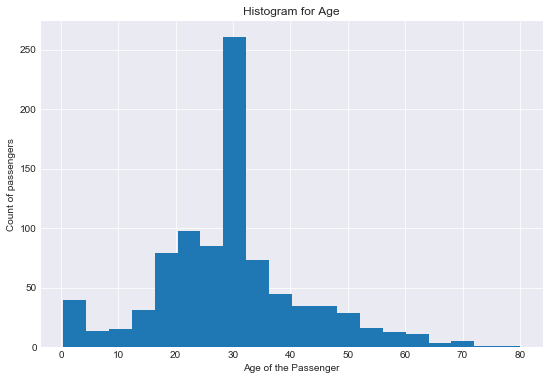

In [66]:
#Histogram for Age
imp_columns_titanic_df.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins
plt.title("Histogram for Age")
plt.xlabel('Age of the Passenger')
plt.ylabel('Count of passengers')

From the histogram  1 or 2 passengers were near age 80. Month babies i.e less than 1 year are few in number. Mostly month old babies are also travelling on the ship.

In [67]:
#To know how many passengers survived
imp_columns_titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [68]:
#Percentage of Survival vs Not Survived
(imp_columns_titanic_df.Survived.value_counts()*100)/len(imp_columns_titanic_df)
#i.e only 38% survived as the answer below

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [69]:
#To know how many male passengers , female passengers are in the Titanic
imp_columns_titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

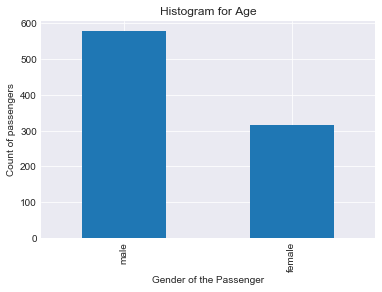

In [70]:
#To visualize male and female in the whole ship regardless of Class status
titanic_df['Sex'].value_counts().plot(kind = 'bar')
plt.title("Histogram for Age")
plt.xlabel('Gender of the Passenger')
plt.ylabel('Count of passengers')

So as per Calculation and as per graph male passengers are more than female passengers

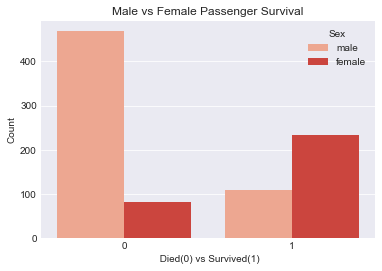

In [71]:
#Explore the relation between Sex(Male, Female) and (Survived vs not Survived)
#So graphically explore first
# survival of men and women
ax = sns.countplot(x="Survived", hue = "Sex", data=imp_columns_titanic_df, palette="Reds")
ax.set_title('Male vs Female Passenger Survival')
ax.set_ylabel('Count')
ax.set_xlabel(' Died(0) vs Survived(1)')

In [72]:
#Calculations part
# Get the totals grouped by Men, Women by survival
imp_columns_titanic_df.groupby(['Sex','Survived']).size()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

So more female passengers are survived and more male passengers are died

In [73]:
#To know how many passengers from class1,2, 3 
imp_columns_titanic_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Second class passengers are very less and Third class passengers are more.
Now let us see a graphilcal representation of total number of male and female passengers(Sex) vs Pclass(class1, Class2, Class3)

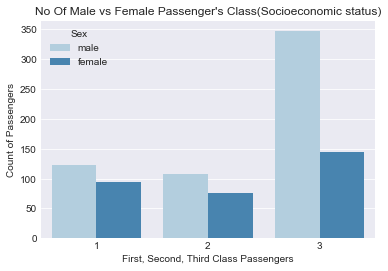

In [74]:
#https://seaborn.pydata.org/generated/seaborn.factorplot.html
#Male, Female and Child count in Different classes
Countplot=sns.countplot(x="Pclass", hue="Sex", data=imp_columns_titanic_df, palette="Blues")
Countplot.set(xlabel = "First, Second, Third Class Passengers", ylabel = "Count of Passengers", title = "No Of Male vs Female Passenger's Class(Socioeconomic status)")

In [75]:
#Calculations part
# Get the totals grouped by Men, Women by Pclass
imp_columns_titanic_df.groupby(['Pclass','Sex']).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

So from graph and calculations also we understood that overall female passengers are less in every class.And Male passengers are more.In 3rd class Male passengers and Female passengers are more


So what's the relation between passenger Class, Sex, and Survival.Before doing further anaysis I want to create another column named Adultorchild.
Instead of Sex I will use this. Adultorchild column contains male_adult, female_adult, child categories

In [76]:
#Consider under 16 as a child, and then use the apply function to create a new column

def male_or_female_or_child(voyager):
    """
    Args:
        age, sex = passengers age in numbers and sex= male or female
        Category includes male_adult, female_adult, child
    Returns:
        # Returns category male_adult, female_adult, child.
    """
    age, sex = voyager
       
    if age < 16:
        return 'child'
    elif sex == "male":
        return "male_adult"
    else:
        return "female_adult"
#Creating  AdultorChild column coloumn in the imp_columns_titanic_df
# As it is a coloumn and not index we need to set axis to 1
imp_columns_titanic_df['AdultorChild'] = imp_columns_titanic_df[['Age', 'Sex']].apply(male_or_female_or_child, axis=1)



In [77]:
#To check whether Adult or Child column is created or not
imp_columns_titanic_df[0:2]

,Survived,Pclass,Sex,Age,SibSp,Parch,AdultorChild
0,0,3,male,22.0,1,0,male_adult
1,1,1,female,38.0,1,0,female_adult


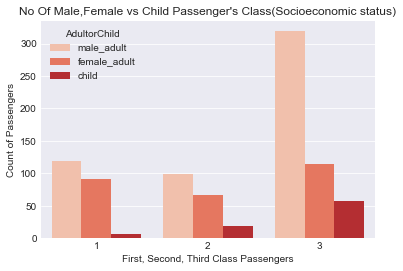

In [78]:
#https://seaborn.pydata.org/generated/seaborn.factorplot.html
#Male, Female and Child count in Different classes
Countplot=sns.countplot(x="Pclass", hue="AdultorChild", data=imp_columns_titanic_df, palette="Reds")
Countplot.set(xlabel = "First, Second, Third Class Passengers", ylabel = "Count of Passengers", title = "No Of Male,Female vs Child Passenger's Class(Socioeconomic status)")

We can understand from above graph that 3rd class men or more and children comparing to other classes are also more. Children are very less in First class.

In [79]:
# to get count of each category in AdultorChild

imp_columns_titanic_df['AdultorChild'].value_counts()

male_adult      537
female_adult    271
child            83
Name: AdultorChild, dtype: int64

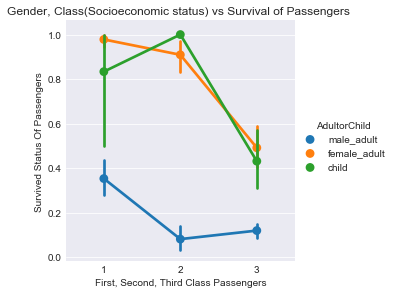

In [80]:
# Graphical representation of survival based on class for male_adult, female_adult, child
#sns.factorplot('survivor', data=titanic_df, palette='Reds', hue='Pclass')

factorplot=sns.factorplot(x='Pclass', y='Survived', hue = "AdultorChild", data=imp_columns_titanic_df)
factorplot.set(xlabel = "First, Second, Third Class Passengers", ylabel = "Survived Status Of Passengers", title = "Gender, Class(Socioeconomic status) vs Survival of Passengers ")

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

In [81]:
#Calculations part
# Get the totals grouped by Men, Women and Children, and by survival
imp_columns_titanic_df.groupby(['AdultorChild','Survived']).size()


AdultorChild  Survived
child         0            34
              1            49
female_adult  0            66
              1           205
male_adult    0           449
              1            88
dtype: int64

Survived Children whose age is less than 16 years were  49,
Died Children whose age is less than 16 years were  34

In [82]:
#How many male_adult, female_adult, child(male and female) Survived vs Pclass
def rate_of_survival(pclass, cat):
    """
    Args:
        pclass: class value 1,2 or 3
        Category includes male_adult, female_adult, child
    Returns:
        # Returns survival rate/percentage of cat(category) and class.
    """
    grouped_by_total = imp_columns_titanic_df.groupby(['Pclass', 'AdultorChild']).size()[pclass,cat].astype('float')
    grouped_by_survived_cat = imp_columns_titanic_df.groupby(['Pclass','Survived','AdultorChild']).size()[pclass,1,cat].astype('float')
    survived_cat_pct = (grouped_by_survived_cat / grouped_by_total * 100).round(2)
    
    return survived_cat_pct
# Get the actual numbers grouped by class, suvival and sex
groupedby_class_survived_size =imp_columns_titanic_df.groupby(['Pclass','Survived','AdultorChild']).size()


# Print - Grouped by class, survival and sex
print groupedby_class_survived_size
print 'Class 1 - female survival rate: {}%'.format(rate_of_survival(1,'female_adult'))
print 'Class 1 - male survival rate: {}%'.format(rate_of_survival(1,'male_adult'))
print 'Class 1 - child survival rate: {}%'.format(rate_of_survival(1,'child'))

print '-----'
print 'Class 2 - female survival rate: {}%'.format(rate_of_survival(2,'female_adult'))
print 'Class 2 - male survival rate: {}%'.format(rate_of_survival(2,'male_adult'))
print 'Class 2 - child survival rate: {}%'.format(rate_of_survival(2,'child'))

print '-----'
print 'Class 3 - female survival rate: {}%'.format(rate_of_survival(3,'female_adult'))
print 'Class 3 - male survival rate: {}%'.format(rate_of_survival(3,'male_adult'))
print 'Class 3 - child survival rate: {}%'.format(rate_of_survival(3,'child'))


Pclass  Survived  AdultorChild
1       0         child             1
                  female_adult      2
                  male_adult       77
        1         child             5
                  female_adult     89
                  male_adult       42
2       0         female_adult      6
                  male_adult       91
        1         child            19
                  female_adult     60
                  male_adult        8
3       0         child            33
                  female_adult     58
                  male_adult      281
        1         child            25
                  female_adult     56
                  male_adult       38
dtype: int64
Class 1 - female survival rate: 97.8%
Class 1 - male survival rate: 35.29%
Class 1 - child survival rate: 83.33%
-----
Class 2 - female survival rate: 90.91%
Class 2 - male survival rate: 8.08%
Class 2 - child survival rate: 100.0%
-----
Class 3 - female survival rate: 49.12%
Class 3 - male survival rate: 11.

From the above results we can say that overall survival rate in first class is more.Women and Children definitely got preference as their survival rate is more.Unfortunately male survuval rate is less.Looks like in 2nd class child Survival rate is 100%.That's good.

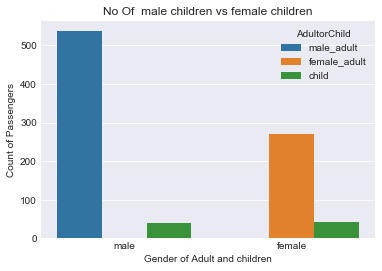

In [83]:
#How many male children vs female children were travelling in ship
Countplot=sns.countplot("Sex", hue="AdultorChild", data=imp_columns_titanic_df)
Countplot.set(xlabel = "Gender of Adult and children", ylabel = "Count of Passengers", title = "No Of  male children vs female children")

From the above calculation we are getting male adults, female adults.
But it's not calculating male children and female children.So let us do that.
 Looks like Male children and Female children are almost in same number.

In [84]:
# Determine number of male children
male_children_total =imp_columns_titanic_df.loc[
    (imp_columns_titanic_df['AdultorChild'] == 'child') &
    (imp_columns_titanic_df['Sex'] == 'male')]['Survived'].count()

# Determine number of female children
female_children_total = imp_columns_titanic_df.loc[
    (imp_columns_titanic_df['AdultorChild'] == 'child') &
    (imp_columns_titanic_df['Sex'] == 'female')] ['Survived'].count()

print "total male children is", male_children_total
print "total female children is", female_children_total


total male children is 40
total female children is 43


So whatever graph reprsented is equal to the calculation.
But what about age? Did being younger or older have an effect on survival rate?
From the above calculations I feel that definitely children less than 16 years of age survival is good when compared to others.

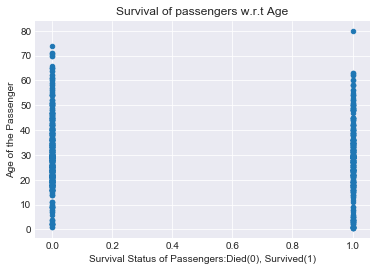

In [85]:
#Survival vs age(Scatter plot)
imp_columns_titanic_df.plot(kind = 'scatter', x = 'Survived', y = 'Age')
plt.title("Survival of passengers w.r.t Age")
plt.xlabel('Survival Status of Passengers:Died(0), Survived(1)')
plt.ylabel('Age of the Passenger')

From this scatter plot, I understood that all age groups are there in survived and not survived. To know in detail try another graph.

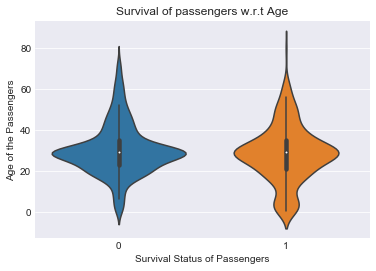

In [86]:
#Let us take a look at violin plot  
sns.violinplot(x="Survived", y="Age", data=imp_columns_titanic_df)
plt.title("Survival of passengers w.r.t Age")
plt.ylabel('Age of the Passengers')
plt.xlabel('Survival Status of Passengers')

In [87]:
# To know Youngest Survived, Oldest Survived, Oldest Died, Oldest survived
#Using min, max
youngest_survived = imp_columns_titanic_df[imp_columns_titanic_df['Survived'] == True]['Age'].min()
youngest_died = imp_columns_titanic_df[imp_columns_titanic_df['Survived'] == False]['Age'].min()
oldest_survived =imp_columns_titanic_df[imp_columns_titanic_df['Survived'] == True]['Age'].max()
oldest_died = imp_columns_titanic_df[imp_columns_titanic_df['Survived'] == False]['Age'].max()

print 'Youngest survived:',youngest_survived
print 'Youngest died:',youngest_died
print 'Oldest survived:', oldest_survived
print 'Oldest died:', oldest_died


Youngest survived: 0.42
Youngest died: 1.0
Oldest survived: 80.0
Oldest died: 74.0


In [88]:
#Check if child is less than 1 years of age.to check whether 0.42 is correct or not?
imp_columns_titanic_df[imp_columns_titanic_df['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,AdultorChild
78,1,2,male,0.83,0,2,child
305,1,1,male,0.92,1,2,child
469,1,3,female,0.75,2,1,child
644,1,3,female,0.75,2,1,child
755,1,2,male,0.67,1,1,child
803,1,3,male,0.42,0,1,child
831,1,2,male,0.83,1,1,child


Total 7 children less than 1 year old are there and all are survived. If age is less than 1 it is fractional.Therefore 0.42 appears to be normal.

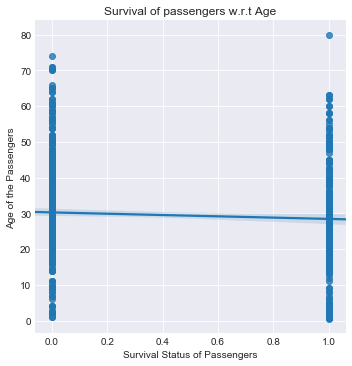

In [89]:
#Plot data and regression model fits across a FacetGrid.This function combines regplot() and FacetGrid. 
sns.lmplot('Survived', 'Age', data=imp_columns_titanic_df)
plt.title("Survival of passengers w.r.t Age")
plt.ylabel('Age of the Passengers')
plt.xlabel('Survival Status of Passengers')

It's difficult to interprete from the above graph. So I am changing Axes

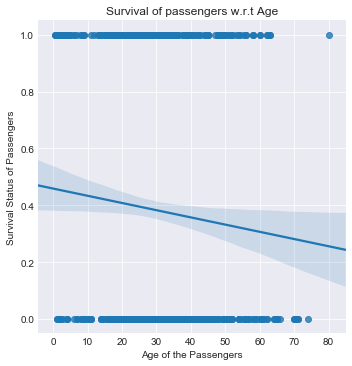

In [90]:
#Plot data and regression model fits across a FacetGrid.This function combines regplot() and FacetGrid. 
sns.lmplot('Age', 'Survived', data=imp_columns_titanic_df)
plt.title("Survival of passengers w.r.t Age")
plt.xlabel('Age of the Passengers')
plt.ylabel('Survival Status of Passengers')

It's understandable from above graph that older passenger was in less number of survivals. Let's go ahead and use hue to take a look at the effect of class and age.

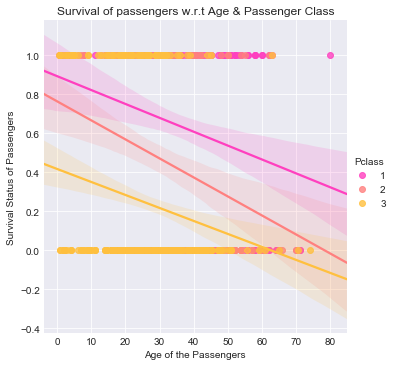

In [91]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=imp_columns_titanic_df,palette='spring')
plt.title("Survival of passengers w.r.t Age & Passenger Class")
plt.xlabel('Age of the Passengers')
plt.ylabel('Survival Status of Passengers')

Calculations and graph confirms first class passenger survival is more.

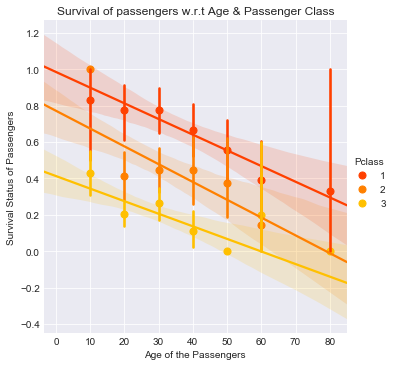

In [92]:
#Use the x_bin argument to clean up this figure and grab the data and bin it by age 
# cleaning up the plot

generations = [10, 20, 30, 40, 50, 60, 80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='autumn', x_bins=generations)
plt.title("Survival of passengers w.r.t Age & Passenger Class")
plt.xlabel('Age of the Passengers')
plt.ylabel('Survival Status of Passengers')

In [93]:
# Adding Family Status column for figuring out the persons travelling alone.
imp_columns_titanic_df['Family_status'] = imp_columns_titanic_df['SibSp'] + imp_columns_titanic_df['Parch']
imp_columns_titanic_df['Family_status'].loc[imp_columns_titanic_df['Family_status'] > 0] = 'With family'
imp_columns_titanic_df['Family_status'].loc[imp_columns_titanic_df['Family_status'] == 0] = 'Alone'

In [94]:
#Check whether Alone column is added or not?
imp_columns_titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,AdultorChild,Family_status
0,0,3,male,22.0,1,0,male_adult,With family
1,1,1,female,38.0,1,0,female_adult,With family
2,1,3,female,26.0,0,0,female_adult,Alone
3,1,1,female,35.0,1,0,female_adult,With family
4,0,3,male,35.0,0,0,male_adult,Alone


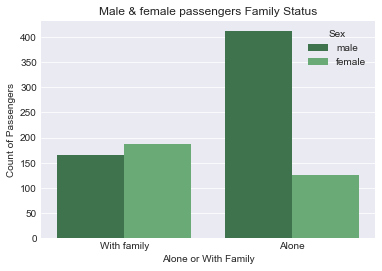

In [95]:
#Plotting male and female travelling alone and travelling with family
countplot = sns.countplot(x="Family_status", hue = "Sex", data=imp_columns_titanic_df, palette="Greens_d")
countplot.set(xlabel = "Alone or With Family", ylabel = "Count of Passengers", title = "Male & female passengers Family Status")

Male passengers travelling alone are more on titanic.

Let us create a new variable, Family_count, that combines SibSp and Parch to indicate the total number of family members. i.e siblings, spouses, parents and children

In [96]:
imp_columns_titanic_df['Family_Count'] = imp_columns_titanic_df['SibSp'] + imp_columns_titanic_df['Parch']

In [97]:
#To check whether family column is added or not?
imp_columns_titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,AdultorChild,Family_status,Family_Count
0,0,3,male,22.0,1,0,male_adult,With family,1
1,1,1,female,38.0,1,0,female_adult,With family,1
2,1,3,female,26.0,0,0,female_adult,Alone,0
3,1,1,female,35.0,1,0,female_adult,With family,1
4,0,3,male,35.0,0,0,male_adult,Alone,0


We can further calculate maximum number of family members on board, Family count equals 2 members or 3 members etc and then survival rate too. From this data we can answer many questions, I say infinite.If we go deeper
children with nannies count and survival rate, children with parents count and survival rate etc can be calculated.

In [98]:
#As I dropped these columns from my anlysis, I want to see how far this Cabin column is useful.
#So I am using the original set titanic_df
titanic_df["Cabin"].count()

204

Only 204 values are available. Remaining all are missing

In [99]:
#From the data set titanic_df Check unique cabins
titanic_df["Cabin"].unique()  


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

We can group the cabins by letter, That helps in getting less number of groups.

In [100]:
#Using Arrays
# Convert data to str
char_cabin = titanic_df["Cabin"].astype(str)
# Take first letter
New_cabin = np.array([cabin[0] for cabin in char_cabin]) 


In [101]:
New_cabin = pd.Categorical(New_cabin)
New_cabin .describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


687 of the records have "n" which means "nan". That means more than 60% of the passengers do not have a cabin. As there are so many missing values, the old Cabin variable is not an useful information for prediction. Use the new cabin variable

In [102]:
titanic_df["Cabin"] = New_cabin
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


By using this I can see which person belonged to which cabin and whether he survived or not etc.Even though I compare with another variable like I will get to know that person is male or female etc. So as I mentioned in the above questions I feel it is not that important in my analysis.

Conclusion:
The results of the analysis indicates that class and sex, namely, being a female from upper social-economic standing (first class), would give one the best chance of survival. While being a man in third class, gave one the lowest chance of survival. Women and children, across all classes, tend to have a higher survival rate than men in genernal. Being a child or woman did not guarentee survival. 
Issues:
Missing data in data sets is a common thing. Detecting missing values is the easy part. But it is more difficult to decide how to handle them. In cases where you have a lot of data and only few missing values, you can simply delete records with missing values. If you have more missing values, removing records with missing values could cause you to get rid of a lot of data. Handling missing values in categorical data is not tough, because you can simply treat NA as an additional category. Handling missing values in numeric variables is tough. Since you can't treat the missing value as a number. The Titanic dataset has some NA's in the Age variable.
A portion of men and women did not have Age data and I replaced mean age for missing values. The category of 'children' was assumed to be anyone under the age of 16( Guess for 1900s)


References:
<li>https://www.kaggle.com/c/titanic/data
<li>https://seaborn.pydata.org/generated/seaborn.countplot.html
<li>http://seaborn.pydata.org/tutorial/categorical.html
<li>https://en.wikipedia.org/wiki/RMS_Titanic
<li>Udacity Introduction to Data Analysis
<li>http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19.html
<li>http://nbviewer.jupyter.org/github/jvns/pandascookbook/tree/master/cookbook